### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. Análise do faturamento


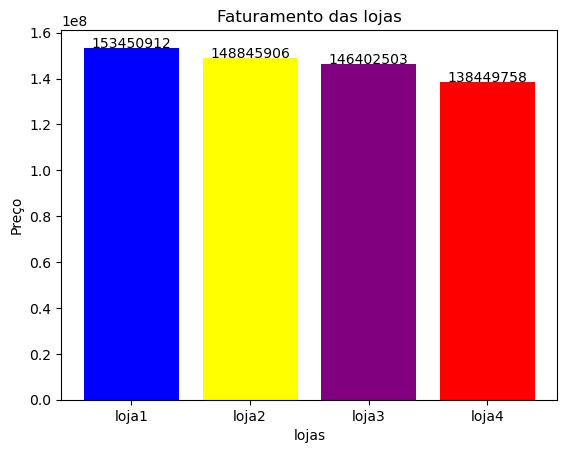

In [171]:
import matplotlib.pyplot as plt
#calcular o faturamento de cada loja
vendas = {lojas[0]['Preço'].sum(), lojas[1]['Preço'].sum(), lojas[2]['Preço'].sum(), lojas[3]['Preço'].sum()}

#separando o faturamento de cada loja
totallojas = ['loja1','loja2', 'loja3', 'loja4']
faturamentos= [1534509.12, 1488459.06, 1464025.03, 1384497.58]
#criando cores para diferenciar cada loja no grafico
cores= ['blue','yellow','purple','red']
for i in range(len(totallojas)):
    plt.text(totallojas[i], faturamentos[i], str(faturamentos[i]), ha='center')
#criando grafico com barras
plt.bar (totallojas, faturamentos, color=cores)
plt.title ('Faturamento das lojas')
plt.xlabel ('lojas')
plt.ylabel('Preço')
plt.show()


# 2. Vendas por Categoria


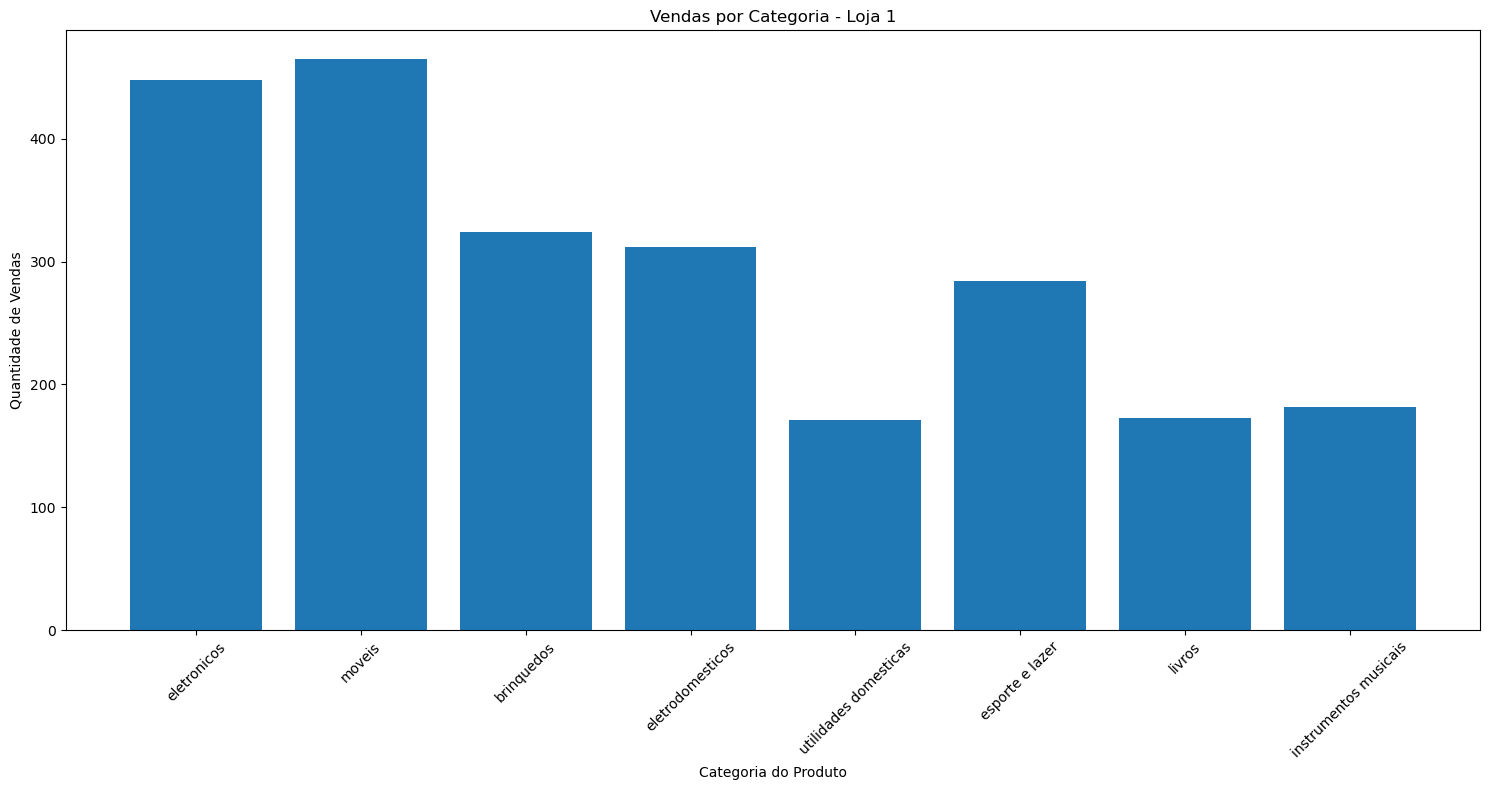

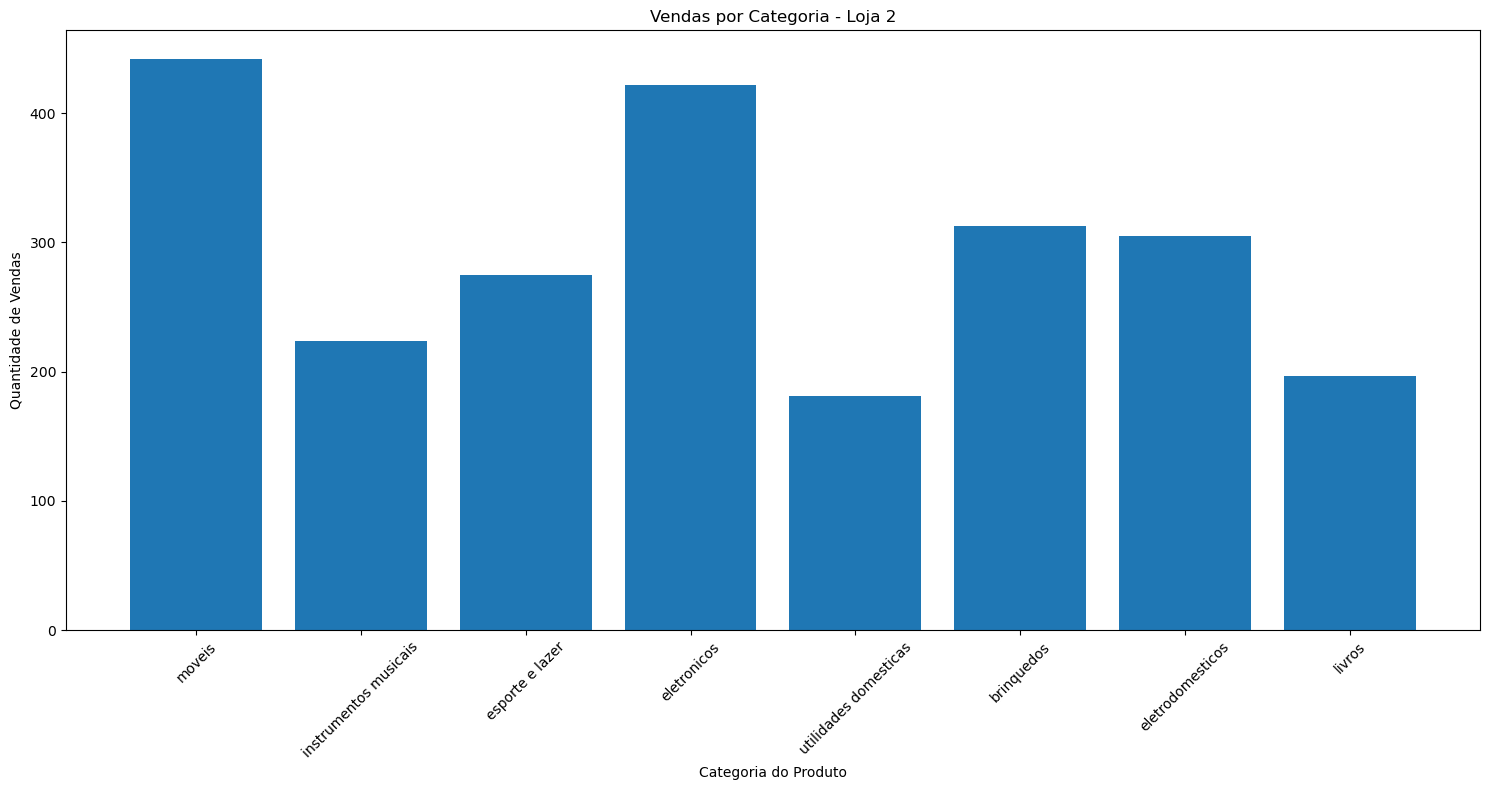

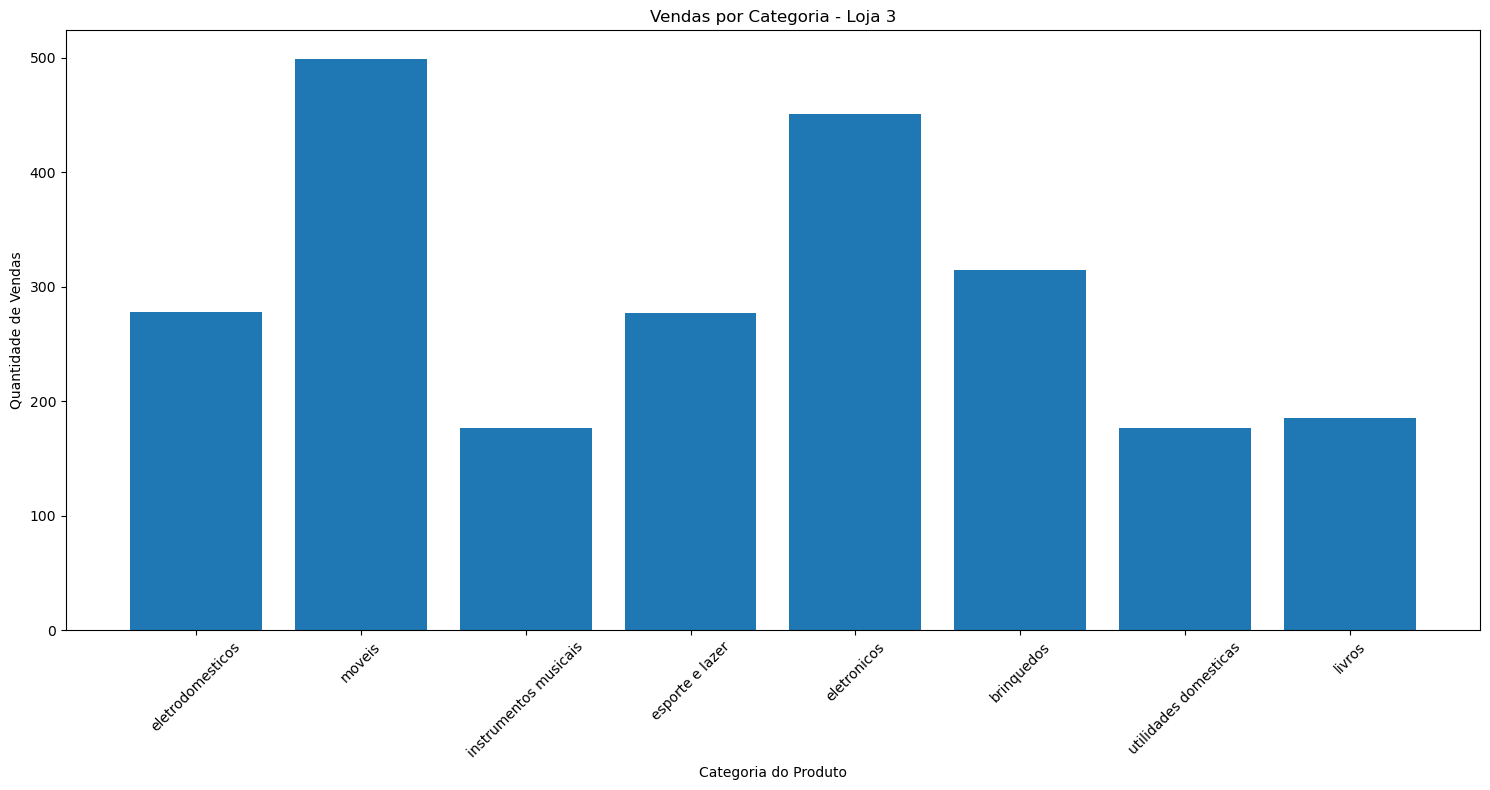

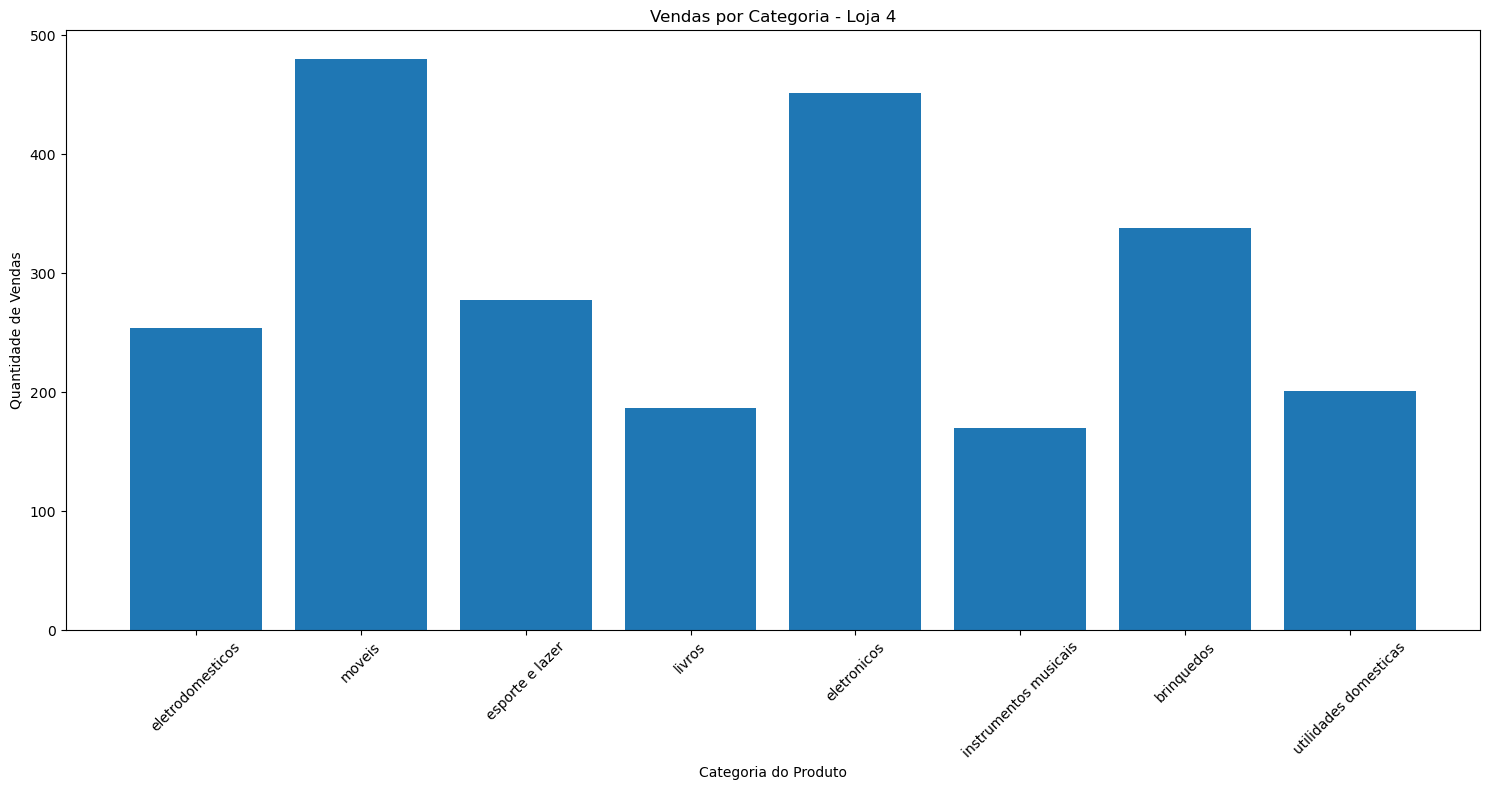

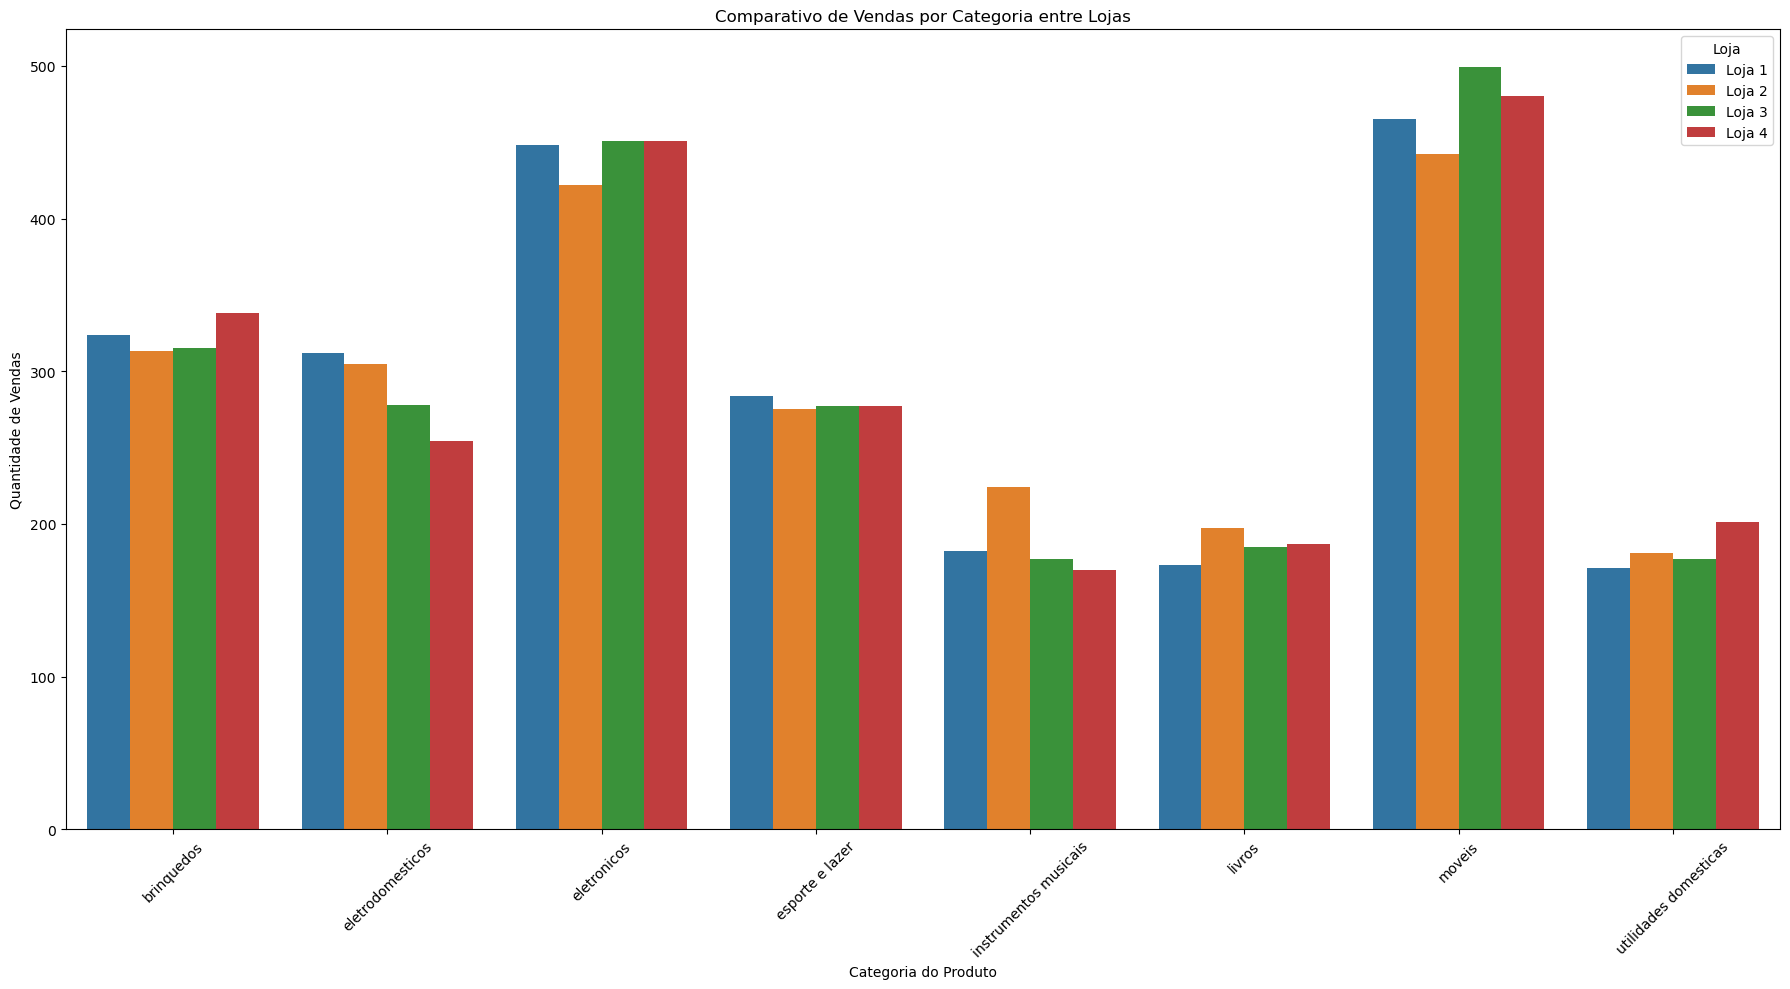

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

url_loja_a = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url_loja_b = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url_loja_c = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url_loja_d = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

lojas = {
    
    'Loja 1': pd.read_csv(url_loja_a),
    'Loja 2': pd.read_csv(url_loja_b),
    'Loja 3': pd.read_csv(url_loja_c),
    'Loja 4': pd.read_csv(url_loja_d)
}
vendas_total = []

for nome_loja, df in lojas.items():
    # Contar quantas vendas por categoria
    vendas_por_categoria = {}
    
    for categoria in df['Categoria do Produto']:
        if categoria in vendas_por_categoria:
            vendas_por_categoria[categoria] += 1
        else:
            vendas_por_categoria[categoria] = 1

    for categoria, quantidade in vendas_por_categoria.items():
        vendas_total.append({'Loja': nome_loja, 'Categoria': categoria, 'Quantidade': quantidade})

    categorias = list(vendas_por_categoria.keys())
    quantidades = list(vendas_por_categoria.values())

    # Criar o gráfico da loja
    plt.figure(figsize=(15,8))
    plt.bar(categorias, quantidades)
    plt.xlabel('Categoria do Produto')
    plt.ylabel('Quantidade de Vendas')
    plt.title(f'Vendas por Categoria - {nome_loja}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


df_total = pd.DataFrame(vendas_total)

df_agrupado = df_total.groupby(['Loja', 'Categoria']).sum().reset_index()

# grafico comparando as lojas
import seaborn as sns

plt.figure(figsize=(18,10))
sns.barplot(data=df_agrupado, x='Categoria', y='Quantidade', hue='Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.title('Comparativo de Vendas por Categoria entre Lojas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

Loja 1: média de avaliação = 3.98
Loja 2: média de avaliação = 4.04
Loja 3: média de avaliação = 4.05
Loja 4: média de avaliação = 4.00


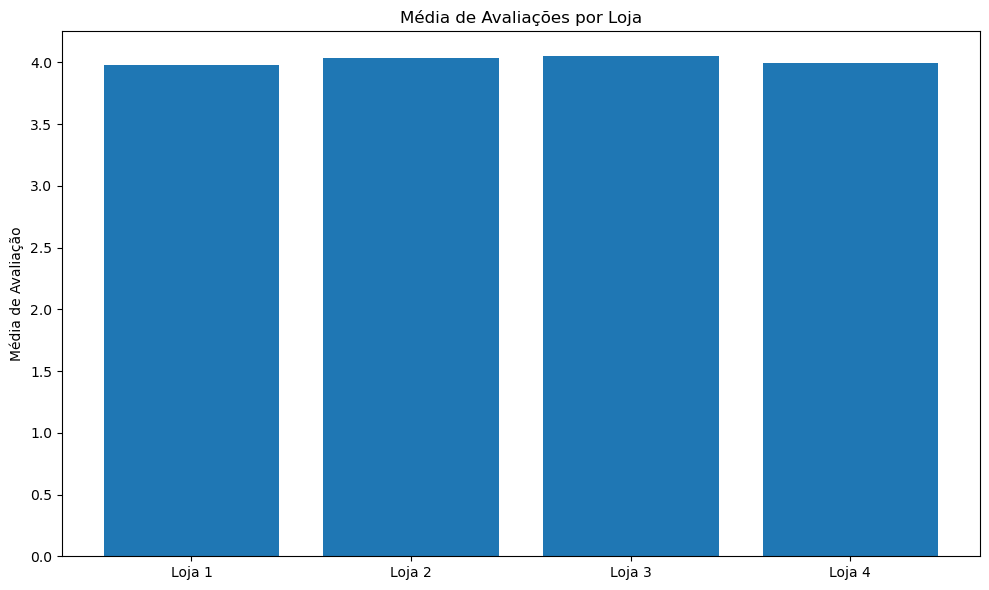

In [25]:
import pandas as pd
lojas = {
    'Loja 1': pd.read_csv(url_loja_a),
    'Loja 2': pd.read_csv(url_loja_b),
    'Loja 3': pd.read_csv(url_loja_c),
    'Loja 4': pd.read_csv(url_loja_d)
}

avaliacoes_medias = {}

for nome_loja, df in lojas.items():
    media = df['Avaliação da compra'].mean()
    avaliacoes_medias[nome_loja] = media

# Mostrar as médias
for loja, media in avaliacoes_medias.items():
    print(f"{loja}: média de avaliação = {media:.2f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(avaliacoes_medias.keys(), avaliacoes_medias.values())
plt.ylabel('Média de Avaliação')
plt.title('Média de Avaliações por Loja')
plt.tight_layout()
plt.show()



# 4. Produtos Mais e Menos Vendidos


--- Loja 1 ---

Top 5 produtos mais vendidos:
Produto
TV Led UHD 4K         60
Guarda roupas         60
Micro-ondas           60
Secadora de roupas    58
Blocos de montar      56
Name: count, dtype: int64

Top 5 produtos menos vendidos:
Produto
Ciência de dados com python    39
Pandeiro                       36
Panela de pressão              35
Headset                        33
Celular ABXY                   33
Name: count, dtype: int64


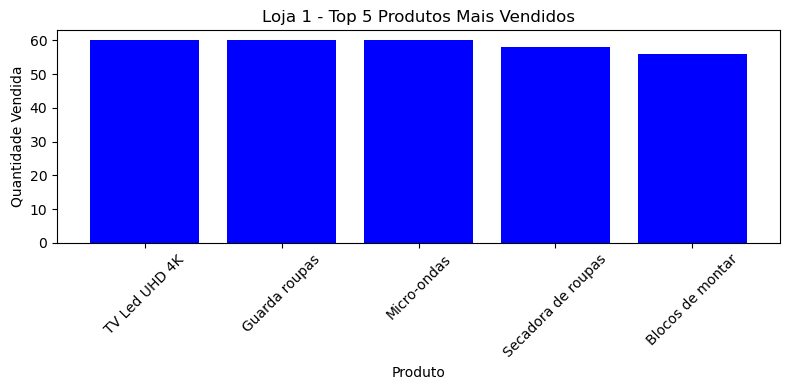


--- Loja 2 ---

Top 5 produtos mais vendidos:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64

Top 5 produtos menos vendidos:
Produto
Fone de ouvido       37
Poltrona             35
Mesa de jantar       34
Impressora           34
Jogo de tabuleiro    32
Name: count, dtype: int64


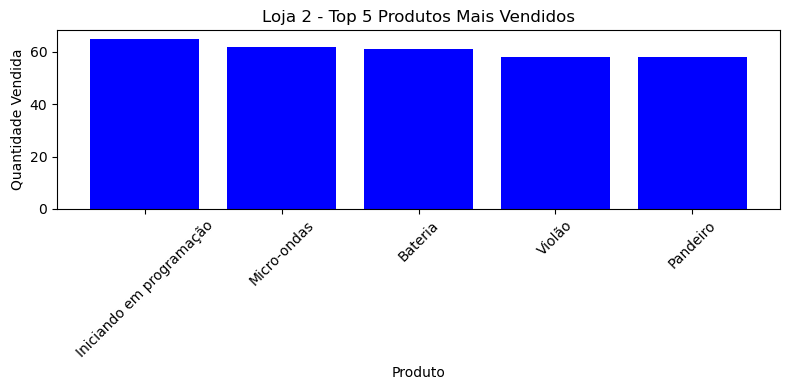


--- Loja 3 ---

Top 5 produtos mais vendidos:
Produto
Kit banquetas      57
Cama king          56
Mesa de jantar     56
Jogo de panelas    55
Cômoda             55
Name: count, dtype: int64

Top 5 produtos menos vendidos:
Produto
Guitarra            38
Mochila             36
Micro-ondas         36
Jogo de copos       36
Blocos de montar    35
Name: count, dtype: int64


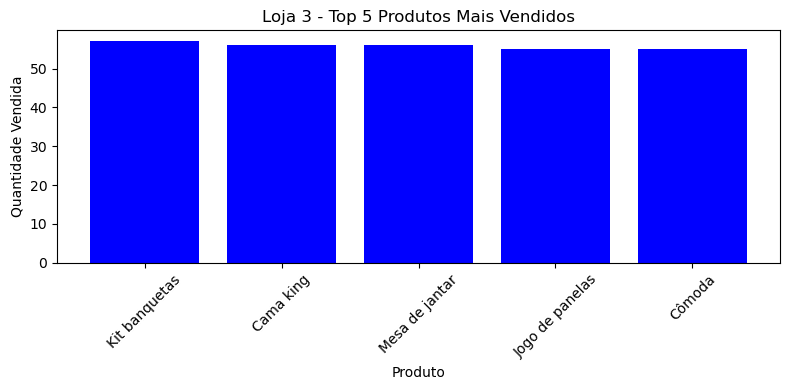


--- Loja 4 ---

Top 5 produtos mais vendidos:
Produto
Cama box                   62
Faqueiro                   59
Dashboards com Power BI    56
Cama king                  56
Cômoda                     55
Name: count, dtype: int64

Top 5 produtos menos vendidos:
Produto
Lavadora de roupas             38
Ciência de dados com python    38
Violão                         37
Guarda roupas                  34
Guitarra                       33
Name: count, dtype: int64


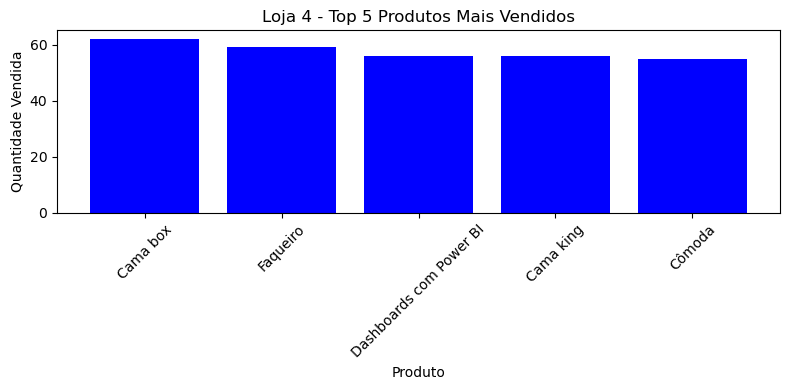

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

lojas = {
    'Loja 1': pd.read_csv(url_loja_a),
    'Loja 2': pd.read_csv(url_loja_b),
    'Loja 3': pd.read_csv(url_loja_c),
    'Loja 4': pd.read_csv(url_loja_d)
}
for nome_loja, df in lojas.items():
    print(f"\n--- {nome_loja} ---")

    vendas_por_produto = df['Produto'].value_counts()

    print("\nTop 5 produtos mais vendidos:")
    print(vendas_por_produto.head(5))

    print("\nTop 5 produtos menos vendidos:")
    print(vendas_por_produto.tail(5))

    plt.figure(figsize=(8, 4))
    top_5 = vendas_por_produto.head(5)
    plt.bar(top_5.index, top_5.values, color='blue')
    plt.title(f'{nome_loja} - Top 5 Produtos Mais Vendidos')
    plt.xlabel('Produto')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 5. Frete Médio por Loja


Loja 1: frete médio = R$ 34.69
Loja 2: frete médio = R$ 33.62
Loja 3: frete médio = R$ 33.07
Loja 4: frete médio = R$ 31.28


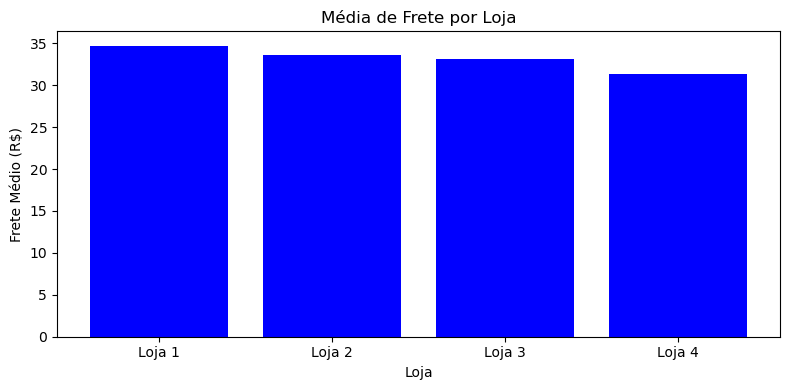

In [33]:
import pandas as pd
lojas = {
    'Loja 1': pd.read_csv(url_loja_a),
    'Loja 2': pd.read_csv(url_loja_b),
    'Loja 3': pd.read_csv(url_loja_c),
    'Loja 4': pd.read_csv(url_loja_d)
}

frete_medio = {}

for nome_loja, df in lojas.items():
    media_frete = df['Frete'].mean()
    frete_medio[nome_loja] = media_frete

for loja, media in frete_medio.items():
    print(f"{loja}: frete médio = R$ {media:.2f}")
    
plt.figure(figsize=(8, 4))
plt.bar(frete_medio.keys(), frete_medio.values(), color='blue')
plt.title('Média de Frete por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.tight_layout()
plt.show()